In [3]:
import sys
sys.path.append("..")

import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader

from datetime import datetime
from pprint import pprint
from models import MarkowitzMinVarianceModel, SharpeRatioMaxModel

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn') # style.use('ggplot') # style.use('fivethirtyeight')
%matplotlib inline

In [4]:
df_tpx500 = pd.read_csv("../data/master/universe_tse_topix500_20011031-20201031.csv")
s = df_tpx500["20101031"].values
s = s[~np.isnan(s)] # delete nan
symbols_tpx500 = s.astype(np.int64).astype(str) # cast as str type
symbols_tpx500 = [str(s)+'.T' for s in symbols_tpx500]
symbols_tpx500

['1332.T',
 '1334.T',
 '1605.T',
 '1662.T',
 '1721.T',
 '1801.T',
 '1802.T',
 '1803.T',
 '1808.T',
 '1812.T',
 '1833.T',
 '1860.T',
 '1878.T',
 '1911.T',
 '1925.T',
 '1928.T',
 '1944.T',
 '1951.T',
 '1963.T',
 '2002.T',
 '2206.T',
 '2212.T',
 '2264.T',
 '2267.T',
 '2269.T',
 '2270.T',
 '2282.T',
 '2331.T',
 '2432.T',
 '2433.T',
 '2501.T',
 '2502.T',
 '2503.T',
 '2531.T',
 '2579.T',
 '2593.T',
 '2607.T',
 '2651.T',
 '2685.T',
 '2730.T',
 '2768.T',
 '2784.T',
 '2801.T',
 '2802.T',
 '2809.T',
 '2810.T',
 '2811.T',
 '2871.T',
 '2875.T',
 '2897.T',
 '2914.T',
 '3002.T',
 '3086.T',
 '3088.T',
 '3099.T',
 '3101.T',
 '3105.T',
 '3116.T',
 '3231.T',
 '3382.T',
 '3401.T',
 '3402.T',
 '3405.T',
 '3407.T',
 '3436.T',
 '3591.T',
 '3626.T',
 '3861.T',
 '3880.T',
 '3893.T',
 '3941.T',
 '4004.T',
 '4005.T',
 '4021.T',
 '4042.T',
 '4043.T',
 '4044.T',
 '4045.T',
 '4061.T',
 '4062.T',
 '4063.T',
 '4088.T',
 '4091.T',
 '4114.T',
 '4118.T',
 '4151.T',
 '4182.T',
 '4183.T',
 '4185.T',
 '4186.T',
 '4188.T',

In [ ]:
st = '2000/10/31' 
ed = '2020/10/31'

dfs = []
for symbol in symbols_tpx500:
    try:
        df = pandas_datareader.data.DataReader(symbol, 'yahoo', st, ed) # daily
        df = df.resample('M').mean() # daily -> monthly
        df = df.sort_values(by='Date', ascending=True)
        df = df.fillna(method='ffill') # 1つ前の行の値で埋める
        df = df[['Close']].rename(columns={'Close': symbol})
        dfs.append(df)
    except:
        pass

df = pd.concat(dfs, axis=1)
df.head()

In [ ]:
for col in df.columns:
    st_idx = df[col].first_valid_index()
    ed_idx = df[col].last_valid_index()
    
    # for any columns (=stocks)
    if df[col].isnull().any():
        # 新規上場
        if st_idx != df.index[0]:
            df[col] = df[col].fillna(df[col][st_idx])

        # 上場廃止
        if df.index[-1] != ed_idx:
            df[col] = df[col].fillna(df[col][ed_idx])

In [ ]:
# check if df includes nan elements
df.isnull().any()

In [5]:
df_tpx500 = pd.read_csv("../data/tse_topix500_20111031-202010131.csv")
df_tpx500

1332.T       1605.T       1662.T       1721.T       1801.T  \
0    267.000000  1315.000000          NaN   775.000000  1055.000000   
1    262.800000  1263.937500          NaN   755.850000  1037.750000   
2    258.952381  1242.023810          NaN   805.476190   985.000000   
3    268.157895  1277.894737          NaN   826.368421  1043.421053   
4    278.238095  1353.809524          NaN   863.380952  1056.666667   
..          ...          ...          ...          ...          ...   
104  491.863636   728.968181  1963.000000  3043.045455  3936.363636   
105  464.238095   645.047616  1821.952381  3169.285714  3843.809524   
106  477.800000   661.805002  1796.650000  3106.800000  3538.000000   
107  460.100000   614.845001  1770.300000  2947.000000  3657.750000   
108  428.636364   545.395458  1748.681818  2790.772727  3471.818182   

          1802.T      1803.T       1808.T       1812.T       1833.T  ...  \
0     361.000000  338.000000   250.000000   506.000000  1550.000000  ...   
1     339.850000  325.500000   245.500000   488.200000  1535.250000  ...   
2     333.761905  316.904762   258.571429   469.238095  1546.190476  ...   
3     360.473684  340.210526   268.684211   504.526316  1612.631579  ...   
4     357.619048  334.809524   295.952381   504.571429  1649.285714  ...   
..           ...         ...          ...          ...          ...  ...   
104  1033.636364  900.000000  1361.727273  1260.818182  2532.590909  ...   
105   994.285714  844.714286  1328.190476  1246.238095  2517.190476  ...   
106  1010.600000  795.700000  1379.300000  1288.750000  2540.400000  ...   
107  1004.700000  807.900000  1459.050000  1304.450000  2612.000000  ...   
108   917.090909  766.090909  1336.000000  1199.818182  2544.045455  ...   

          9793.T      9831.T       9832.T        9843.T       9861.T  \
0    1448.000000  568.000000  1235.000000   3760.000000  1003.000000   
1    1386.250000  567.400000  1196.666498   3706.250000  1008.050000   
2    1330.619048  540.904762  1184.126180   3581.904762  1033.904762   
3    1322.105263  498.842105  1191.491050   3543.421053  1072.421053   
4    1418.190476  519.119048  1249.286197   3482.857143  1089.857143   
..           ...         ...          ...           ...          ...   
104  2775.545455  541.954545  1383.636364  19882.954545  2364.454545   
105  2478.666667  492.952381  1340.952381  22339.047619  2048.714286   
106  2436.850000  539.000000  1364.350000  22585.750000  2040.900000   
107  2622.950000  541.700000  1395.000000  21526.500000  2052.500000   
108  2768.318182  516.636364  1388.227273  21716.136364  1938.500000   

          9962.T        9983.T       9984.T       9987.T       9989.T  
0     552.666992  14230.000000  1294.000000  1720.000000  1166.500000  
1     546.650000  13005.000000  1286.575000  1755.727502  1182.450000  
2     576.825288  13255.714286  1179.904762  1882.337623  1174.238095  
3     584.140317  14657.894737  1095.710526  1964.114213  1145.815789  
4     638.539760  16067.619048  1166.261905  2136.882406  1142.880952  
..           ...           ...          ...          ...          ...  
104  2834.500000  62974.090909  5287.318182  4007.272727  3555.909091  
105  2708.952381  60018.095238  6311.333333  3859.285714  3561.904762  
106  2700.950000  60891.000000  6453.700000  3919.500000  3882.250000  
107  2931.400000  65510.500000  6278.600000  4084.000000  3968.000000  
108  2979.818182  70524.545455  6970.545455  3846.590909  4004.545455  

[109 rows x 471 columns]

In [6]:
df = df_tpx500

for col in df.columns:
    st_idx = df[col].first_valid_index()
    ed_idx = df[col].last_valid_index()
    
    if df[col].isnull().any():
        # 新規上場
        if st_idx != df.index[0]:
            df[col] = df[col].fillna(df[col][st_idx])

        # 上場廃止
        if df.index[-1] != ed_idx:
            df[col] = df[col].fillna(df[col][ed_idx])

In [7]:
df

1332.T       1605.T       1662.T       1721.T       1801.T  \
0    267.000000  1315.000000  3017.400000   775.000000  1055.000000   
1    262.800000  1263.937500  3017.400000   755.850000  1037.750000   
2    258.952381  1242.023810  3017.400000   805.476190   985.000000   
3    268.157895  1277.894737  3017.400000   826.368421  1043.421053   
4    278.238095  1353.809524  3017.400000   863.380952  1056.666667   
..          ...          ...          ...          ...          ...   
104  491.863636   728.968181  1963.000000  3043.045455  3936.363636   
105  464.238095   645.047616  1821.952381  3169.285714  3843.809524   
106  477.800000   661.805002  1796.650000  3106.800000  3538.000000   
107  460.100000   614.845001  1770.300000  2947.000000  3657.750000   
108  428.636364   545.395458  1748.681818  2790.772727  3471.818182   

          1802.T      1803.T       1808.T       1812.T       1833.T  ...  \
0     361.000000  338.000000   250.000000   506.000000  1550.000000  ...   
1     339.850000  325.500000   245.500000   488.200000  1535.250000  ...   
2     333.761905  316.904762   258.571429   469.238095  1546.190476  ...   
3     360.473684  340.210526   268.684211   504.526316  1612.631579  ...   
4     357.619048  334.809524   295.952381   504.571429  1649.285714  ...   
..           ...         ...          ...          ...          ...  ...   
104  1033.636364  900.000000  1361.727273  1260.818182  2532.590909  ...   
105   994.285714  844.714286  1328.190476  1246.238095  2517.190476  ...   
106  1010.600000  795.700000  1379.300000  1288.750000  2540.400000  ...   
107  1004.700000  807.900000  1459.050000  1304.450000  2612.000000  ...   
108   917.090909  766.090909  1336.000000  1199.818182  2544.045455  ...   

          9793.T      9831.T       9832.T        9843.T       9861.T  \
0    1448.000000  568.000000  1235.000000   3760.000000  1003.000000   
1    1386.250000  567.400000  1196.666498   3706.250000  1008.050000   
2    1330.619048  540.904762  1184.126180   3581.904762  1033.904762   
3    1322.105263  498.842105  1191.491050   3543.421053  1072.421053   
4    1418.190476  519.119048  1249.286197   3482.857143  1089.857143   
..           ...         ...          ...           ...          ...   
104  2775.545455  541.954545  1383.636364  19882.954545  2364.454545   
105  2478.666667  492.952381  1340.952381  22339.047619  2048.714286   
106  2436.850000  539.000000  1364.350000  22585.750000  2040.900000   
107  2622.950000  541.700000  1395.000000  21526.500000  2052.500000   
108  2768.318182  516.636364  1388.227273  21716.136364  1938.500000   

          9962.T        9983.T       9984.T       9987.T       9989.T  
0     552.666992  14230.000000  1294.000000  1720.000000  1166.500000  
1     546.650000  13005.000000  1286.575000  1755.727502  1182.450000  
2     576.825288  13255.714286  1179.904762  1882.337623  1174.238095  
3     584.140317  14657.894737  1095.710526  1964.114213  1145.815789  
4     638.539760  16067.619048  1166.261905  2136.882406  1142.880952  
..           ...           ...          ...          ...          ...  
104  2834.500000  62974.090909  5287.318182  4007.272727  3555.909091  
105  2708.952381  60018.095238  6311.333333  3859.285714  3561.904762  
106  2700.950000  60891.000000  6453.700000  3919.500000  3882.250000  
107  2931.400000  65510.500000  6278.600000  4084.000000  3968.000000  
108  2979.818182  70524.545455  6970.545455  3846.590909  4004.545455  

[109 rows x 471 columns]

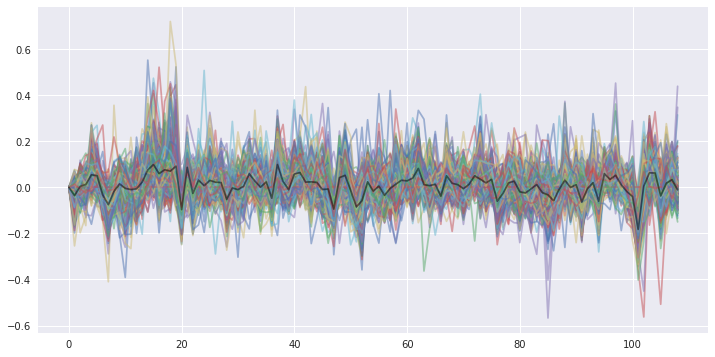

In [8]:
df_retchg = df.pct_change()
df_retchg[:1] = 0.0 # set 0.0 to the first record

plt.figure(figsize=(12, 6))
for idx, col in enumerate(df.columns):
    plt.plot(df_retchg.index, df_retchg[col], label=col, alpha=0.5)
plt.plot(df_retchg.index, df_retchg.mean(axis='columns'), label="topix30 mean", color="black", alpha=0.5)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

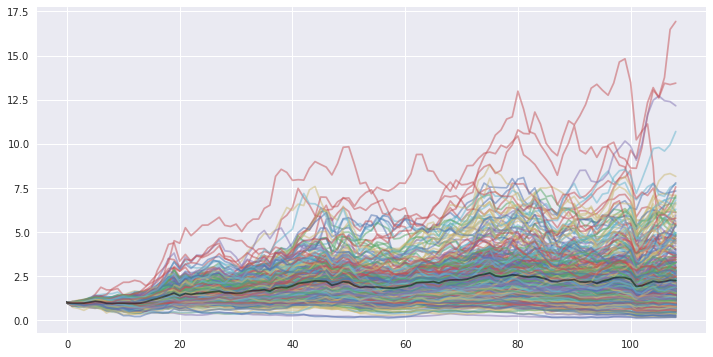

In [9]:
df_retcum = (1.0 + df_retchg).cumprod()
df_retcum[:1] = 1.0 # set 1.0 to the first record

plt.figure(figsize=(12, 6))
for idx, col in enumerate(df.columns):
    plt.plot(df_retcum.index, df_retcum[col], label=col, alpha=0.5)
plt.plot(df_retcum.index, df_retcum.mean(axis='columns'), label="topix30 mean", color="black", alpha=0.5)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# backtesting

In [14]:
# Risk-free rate (10Year-JGB, monthly interest)
r_f = (1 + 0.0001) ** (1/12) - 1.0
r_e = r_f # (1 + 0.01) ** (1/12) - 1.0

Portfolio Performance
Returns per month
  sharpe ratio     : -0.03767857
  mean of returns  : 0.00000015
  std of returns   : 0.00021726
    risk-free rate : 0.00000833
    capgain ratio  : 0.00000901
Returns per year
  sharpe ratio     : -0.13052847
  mean of returns  : 0.00000176
  std of returns   : 0.00075263


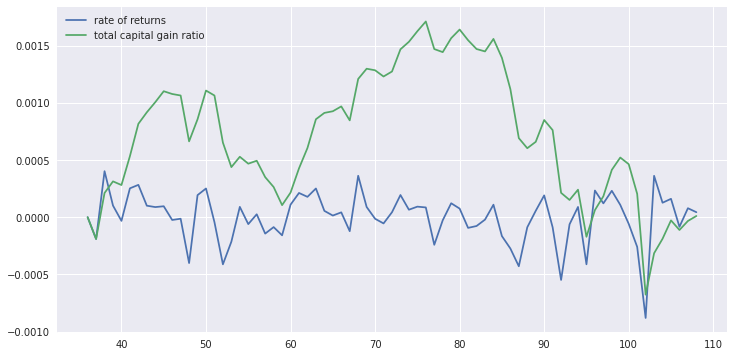

In [15]:
params = {
    "window_size": 36,
    "rebalance_freq": 1,
    "r_e": r_e,
    "r_f": r_f
}

# mmvp
mmvp = MarkowitzMinVarianceModel(df, **params)
df_bt = mmvp.backtest()
mmvp.evaluate_backtest(logging=True)
mmvp.plot_returns()

Portfolio Performance
Returns per month
  sharpe ratio     : 0.12017496
  mean of returns  : 0.00002898
  std of returns   : 0.00017184
    risk-free rate : 0.00000833
    capgain ratio  : 0.00142048
Returns per year
  sharpe ratio     : 0.41629057
  mean of returns  : 0.00034780
  std of returns   : 0.00059527


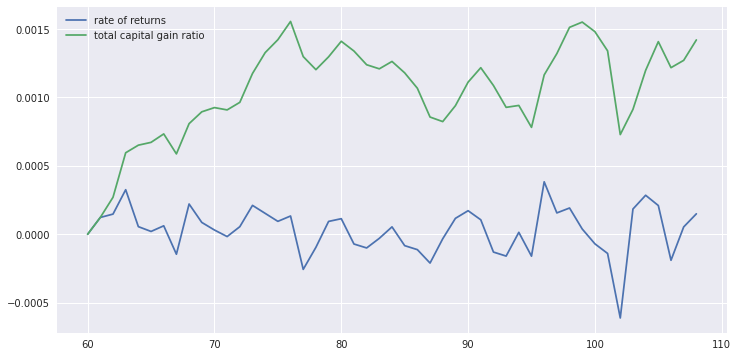

In [24]:
params = {
    "window_size": 60,
    "rebalance_freq": 1,
    "r_e": r_e,
    "r_f": r_f
}

# mmvp
mmvp = MarkowitzMinVarianceModel(df, **params)
df_bt = mmvp.backtest()
mmvp.evaluate_backtest(logging=True)
mmvp.plot_returns()

Portfolio Performance
Returns per month
  sharpe ratio     : 0.14063489
  mean of returns  : 0.00453204
  std of returns   : 0.03216632
    risk-free rate : 0.00000833
    capgain ratio  : 0.96909453
Returns per year
  sharpe ratio     : 0.48717351
  mean of returns  : 0.05438447
  std of returns   : 0.11142739


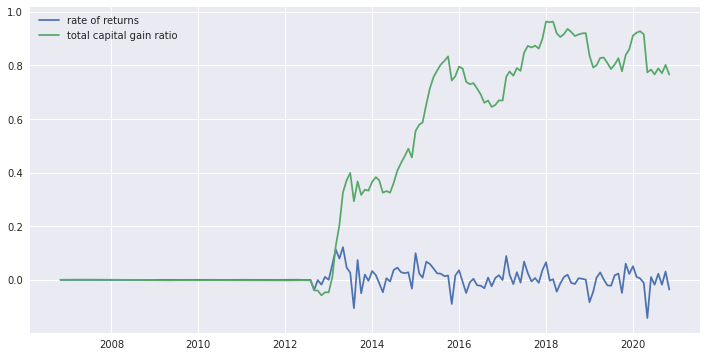

In [9]:
params = {
    "window_size": 72,
    "rebalance_freq": 1,
    "r_e": r_e,
    "r_f": r_f
}

# mmvp
mmvp = MarkowitzMinVarianceModel(df, **params)
df_bt = mmvp.backtest()
mmvp.evaluate_backtest(logging=True)
mmvp.plot_returns()

Portfolio Performance
Returns per month
  sharpe ratio     : 0.19504268
  mean of returns  : 0.01337199
  std of returns   : 0.06851657
    risk-free rate : 0.00000833
    capgain ratio  : 0.88989955
Returns per year
  sharpe ratio     : 0.67564766
  mean of returns  : 0.16046386
  std of returns   : 0.23734835


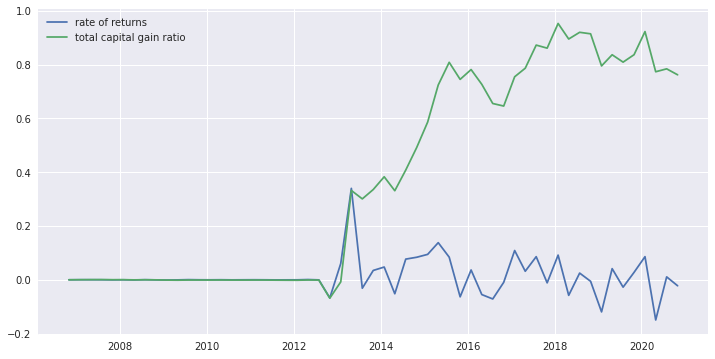

In [10]:
params = {
    "window_size": 72,
    "rebalance_freq": 3,
    "r_e": r_e,
    "r_f": r_f
}

# mmvp
mmvp = MarkowitzMinVarianceModel(df, **params)
df_bt = mmvp.backtest()
mmvp.evaluate_backtest(logging=True)
mmvp.plot_returns()

Portfolio Performance
Returns per month
  sharpe ratio     : 0.11889813
  mean of returns  : 0.00456860
  std of returns   : 0.03835439
    risk-free rate : 0.00000833
    capgain ratio  : 0.58963429
Returns per year
  sharpe ratio     : 0.41187518
  mean of returns  : 0.05482318
  std of returns   : 0.13286350


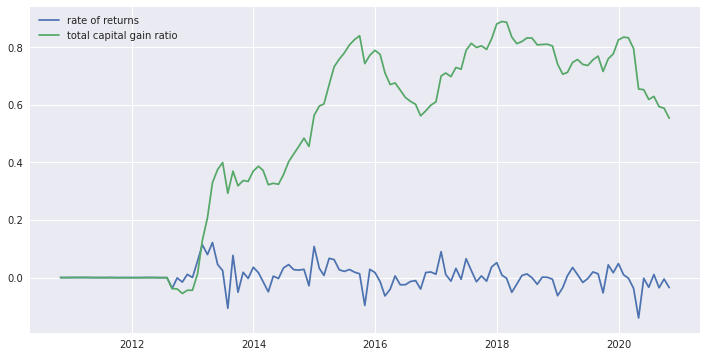

In [11]:
params = {
    "window_size": 120,
    "rebalance_freq": 1,
    "r_e": r_e,
    "r_f": r_f
}

# mmvp
mmvp = MarkowitzMinVarianceModel(df, **params)
df_bt = mmvp.backtest()
mmvp.evaluate_backtest(logging=True)
mmvp.plot_returns()